***

## Support Vector Regression (SVR)

***

### 👉🏾 Data Preprocessing

#### ☑️ Importing Datasets and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/HP Elitebook/OneDrive/Bureau/HOMEWORKS/ML_BOOTCAMP/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

<div class = 'alert alert-block alert-warning'> ⚠️⚠️⚠️ We reshape <b>y</b> into vertical 2D-array because the feature scaling method expect unique formats for features to work. </div>

In [4]:
y = y[:, np.newaxis]

#### ☑️ Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y = sc_y.fit_transform(y)
x = sc_x.fit_transform(x)

### 👉🏾 Training the model

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\HP Elitebook\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### 👉🏾 Predictions 

<div class = 'alert alert-block alert-warning'> ⚠️⚠️⚠️ As our features are scaled, we have to scaled the predicting variable too for a correct prediction. <br> And for a fair result we must reverse the scaling transformation with the <code> inverse_transform()</code> method from the concerned class</div>

In [7]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

### 👉🏾 Visualizations

#### ☑️ Simple Visualization 🆚 Advanced Visualization

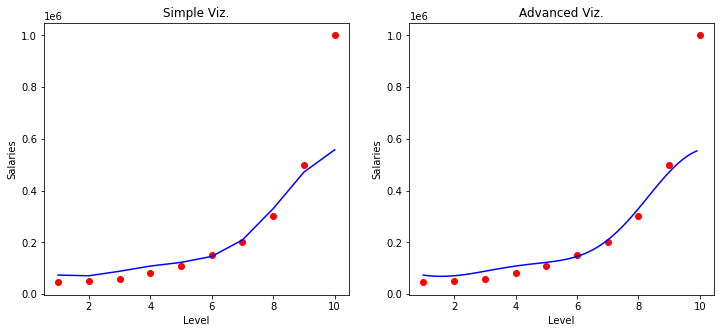

In [10]:
# Trying to refine x for a smooth curve
x_g = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_g = x_g[:,np.newaxis]
# Simple Viz Plotting
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.scatter(sc_x.inverse_transform(x), # Inversing the scaling to get initial number
            sc_y.inverse_transform(y), # ''
            c = 'red')
plt.plot(sc_x.inverse_transform(x),    # ''
         sc_y.inverse_transform(regressor.predict(x)), # Inversing the scaling to Y_size so the prediction will be in the same range as Y 
         c = 'blue')
plt.title('Simple Viz.')
plt.ylabel('Salaries')
plt.xlabel('Level')
# Advanced Viz Plotting
plt.subplot(1,2,2)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), c = 'red')
plt.plot(x_g,
         sc_y.inverse_transform(regressor.predict(sc_x.transform(x_g))),# After setting X into orginal scale, 
         #we must put it back to Standard Scale for the prediction method
         # And inverse again to the Y_scale
         c = 'blue')
plt.title('Advanced Viz.')
plt.ylabel('Salaries')
plt.xlabel('Level')
plt.show()